In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from Libraries.Util import Norm01
import warnings
warnings.filterwarnings("ignore")

C:\Users\user\WPy64-3720\python-3.7.2.amd64\lib\site-packages\tqdm\autonotebook\__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
'''Load the computed values and minimal MAPE calculation'''
datadir='RealWeekly' #real-world data set
filename='real01_table.csv'#'real_table.csv' # the result of ForecastAndFeatures.py
# datadir='Art_series' #artificial time series
# filename='art_table.csv'
table=pd.read_csv(filename)
minmape=[np.min(table.loc[i,['VARmape', 'LAmape', 'MSSAmape', 'Choomape', 'RNNmape']]) for i in table.index] # mean value is also possible
table['minmape']=minmape
table.describe()

,VARmape,LAmape,MSSAmape,Choomape,RNNmape,Gsize,Grent,Connect,Assort,Density,Modularity,Cycles,Noise,Hurst,KSent,Rndwl,Corent,minmape
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,16.305998,25.459691,29.161018,19.959419,21.504847,2.270284,4.052988,0.832110,0.409247,0.150091,0.165422,0.211914,0.863790,0.542813,7.354636,0.196571,3.759610,14.750074
std,13.060365,18.450401,24.022203,14.345258,15.955981,0.237959,0.429869,0.199961,0.183165,0.054158,0.084103,0.234374,0.189134,0.143411,0.911966,0.162093,0.925229,11.493582
min,1.228288,1.718927,2.990121,1.300883,3.888614,1.592593,3.274947,0.511111,-0.121212,0.061254,0.037037,0.000000,0.218597,0.265756,4.601259,0.002347,0.735877,1.228288
25%,4.586335,6.636961,8.986561,7.650159,10.459936,2.198317,3.700884,0.664822,0.358969,0.114881,0.101316,0.051389,0.877696,0.463783,7.202499,0.044981,3.573111,4.561282
50%,15.536286,24.134909,24.950528,18.915581,18.620247,2.313393,4.108253,0.852556,0.427006,0.134804,0.142140,0.095455,0.928284,0.553460,7.766393,0.149122,4.175712,13.833303
75%,21.203479,39.618555,41.887540,28.801386,28.017680,2.356092,4.362054,1.004931,0.486682,0.194202,0.232026,0.353383,0.974904,0.611644,7.921549,0.336209,4.297254,19.197387
max,54.560056,68.539261,110.004362,52.740090,68.247101,2.782609,4.892588,1.183794,0.776971,0.277778,0.333333,0.934857,0.989945,0.952584,8.138675,0.600256,4.476376,46.820455


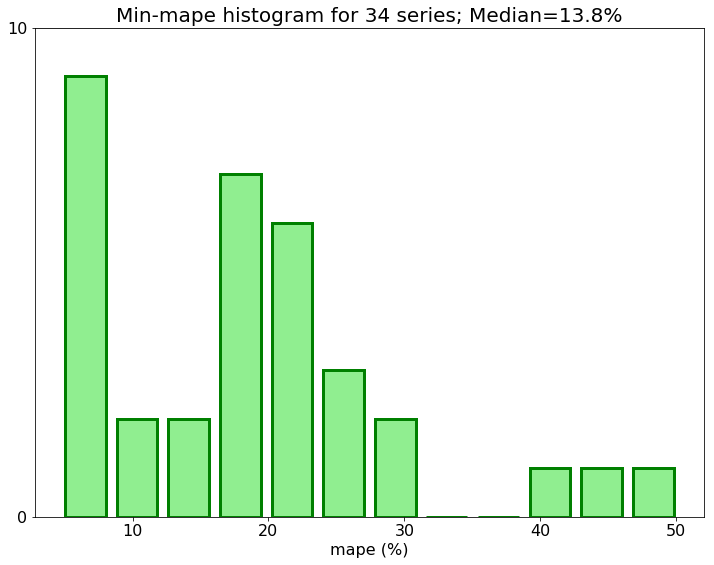

In [3]:
'''Minimal MAPE distribution'''
hist, bins=np.histogram(table.minmape, bins=12)
plt.figure(figsize=(12,9))
plt.title('Min-mape histogram for %d series; Median=%.1f%%'%(len(table), np.median(table.minmape)), size=20)
plt.bar(bins[1:],hist, width=3., color='lightgreen', edgecolor='green', lw=3, align='edge')
plt.xlabel('mape (%)', size=16)
plt.xticks(size=16)
plt.yticks(np.arange(0, max(hist)+5,10),size=16)
plt.grid(axis='y')
#plt.savefig('hist.png', dpi=600, facecolor='w', edgecolor='w', orientation='landscape')
plt.show()

VAR model is the best for 22 series
LA model is the best for 3 series
MSSA model is the best for 1 series
Choo model is the best for 6 series
RNN model is the best for 2 series


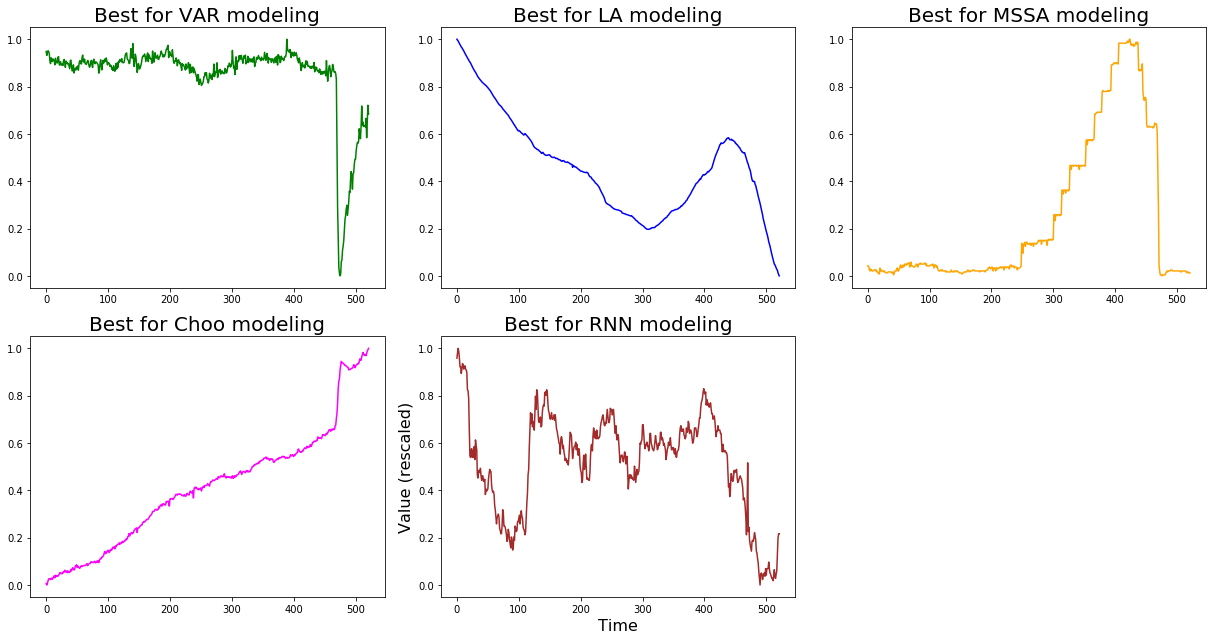

In [4]:
'''Series examples best for each of the models'''
colors=['green', 'blue', 'orange', 'magenta', 'brown']
plt.figure(figsize=(17,9))
plt.title('Examples of time series for best modeling', size=20)
for n,m in enumerate(table[['VARmape', 'LAmape', 'MSSAmape', 'Choomape', 'RNNmape']]):
    num=len(table[table[m]==table.minmape])
    print('%s model is the best for %i series'%(m[:-4], num))
    if not num:
        continue
    if datadir == 'RealWeekly':
        data=pd.read_csv(datadir+'/'+table[table[m]==table.minmape].Series.values[-1]+'.csv', sep=',')
        data[data.columns[0]]=pd.to_numeric(data[data.columns[1]], errors='coerce', downcast='float')
        data.fillna(method='ffill',inplace=True)
        x=data[data.columns[1]].values[:]
        '''Filtering of various kinds'''
        x=np.delete(x, np.where(x=='.')).astype(float)
        x=Norm01(x)[0]#/max(x)
        plt.subplot(2,3,n+1)
        plt.title('Best for %s modeling'%m[:-4], size=20)
        plt.plot(x, label=m[:-4], color=colors[n])
plt.xlabel('Time', size=16)
plt.ylabel('Value (rescaled)', size=16)
plt.tight_layout()
#plt.savefig('series_for_model.png', dpi=600, facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

,Gsize,Grent,Connect,Assort,Density,Modularity,Cycles,Noise,Hurst,KSent,Rndwl,Corent,minmape
Gsize,1.000000,-0.195459,0.242560,-0.257776,0.394492,0.368189,0.378169,0.415396,0.259739,0.632370,-0.140051,0.728982,-0.413187
Grent,-0.195459,1.000000,0.496648,0.189016,-0.966254,0.328259,0.604631,-0.430464,-0.336276,-0.141928,0.010065,-0.169101,0.553079
Connect,0.242560,0.496648,1.000000,-0.007502,-0.376589,0.163546,0.706641,-0.216972,-0.080700,0.016722,0.116151,0.008205,0.471315
Assort,-0.257776,0.189016,-0.007502,1.000000,-0.185567,-0.146363,0.091319,-0.376613,-0.297183,-0.391018,0.141749,-0.405239,0.189013
Density,0.394492,-0.966254,-0.376589,-0.185567,1.000000,-0.250592,-0.453945,0.449463,0.318198,0.239391,-0.031265,0.291342,-0.596145
Modularity,0.368189,0.328259,0.163546,-0.146363,-0.250592,1.000000,0.532832,-0.151342,-0.299765,0.326881,-0.047874,0.346442,0.084188
Cycles,0.378169,0.604631,0.706641,0.091319,-0.453945,0.532832,1.000000,-0.337002,-0.239854,0.178850,0.151511,0.168952,0.287346
Noise,0.415396,-0.430464,-0.216972,-0.376613,0.449463,-0.151342,-0.337002,1.000000,0.738771,0.462130,-0.346192,0.566679,-0.408876
Hurst,0.259739,-0.336276,-0.080700,-0.297183,0.318198,-0.299765,-0.239854,0.738771,1.000000,0.466795,0.091584,0.490879,-0.366023
KSent,0.632370,-0.141928,0.016722,-0.391018,0.239391,0.326881,0.178850,0.462130,0.466795,1.000000,0.051744,0.924483,-0.526060


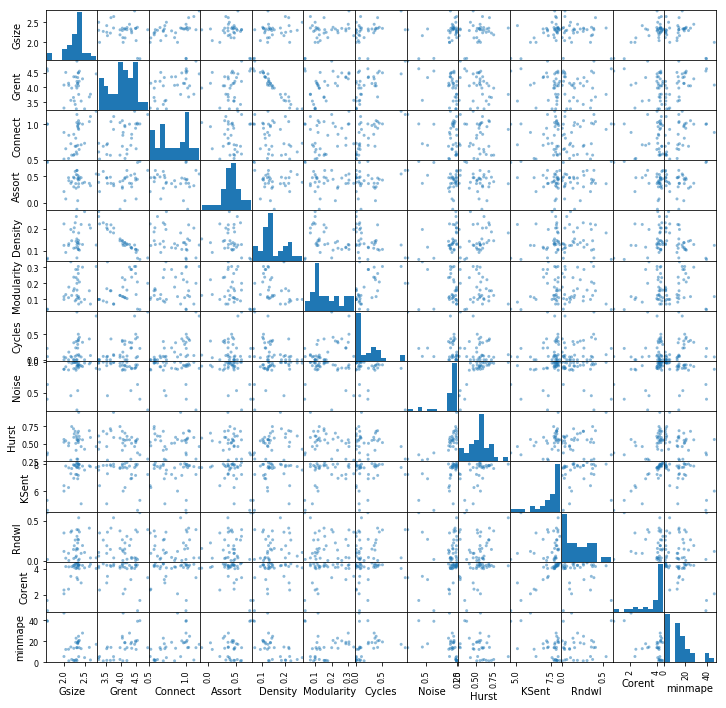

In [5]:
'''Serching for correlations'''
pd.plotting.scatter_matrix(table[table.columns[6:]].astype(float),figsize=(12,12))
table[table.columns[6:]].astype(float).corr()

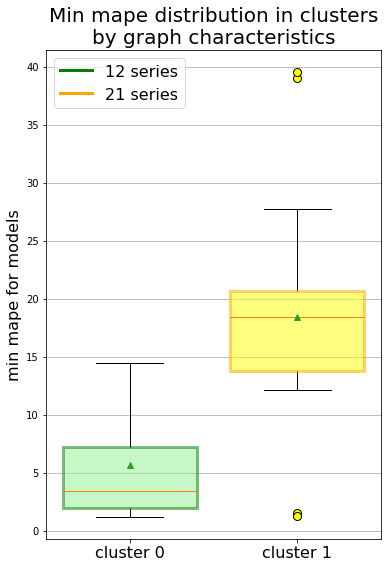

In [6]:
'''Clustering by graph characteristics'''
z=['Grent','Connect','Cycles']
table=table.dropna()
model = KMeans(n_clusters=2)
zz=table[z]
model.fit(zz)
cluster=model.predict(zz)
table['cluster']=cluster
c0=table[table.cluster == 0].minmape.values
c1=table[table.cluster == 1].minmape.values
if c0.mean()>c1.mean(): #Let cluster 0 be for 'good' predictability
    table.cluster = 1-table.cluster.values
    c0=table[table.cluster == 0].minmape.values
    c1=table[table.cluster == 1].minmape.values
del model
'''Pictured boxplots for clusters'''
boxprops1 = dict(linewidth=3, color='green', facecolor = 'lightgreen', alpha=.5)
boxprops2 = dict(linewidth=3, color='orange', facecolor = 'yellow', alpha=.5)
flierprops = dict(marker='o', markerfacecolor='yellow', markersize=8, linestyle='none') 
plt.figure(figsize=(6,9))
plt.title('Min mape distribution in clusters\nby graph characteristics', size=20)
plt.boxplot([c0],positions = [1],widths=0.8,
            boxprops=boxprops1,flierprops=flierprops, showmeans=True, patch_artist=True)
plt.boxplot([c1],positions = [2],widths=0.8,
            boxprops=boxprops2,flierprops=flierprops, showmeans=True, patch_artist=True)
plt.plot([],c='green', lw=3, label='%d series'%len(c0))
plt.plot([],c='orange', lw=3, label='%d series'%len(c1))
plt.xticks([1,2],['cluster 0','cluster 1'], fontsize=16)
plt.xlim(0.5,2.5)
plt.ylabel('min mape for models', size=16)
plt.grid(axis='y')
plt.legend(loc=2, fontsize=16)
#plt.savefig('box_grapf.png', dpi=600, facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

In [7]:
'''F1-score and accurasy on median MAPE bound'''
bound = np.median(table.minmape)
tp=len(table[(table.cluster==0) & (table.minmape<bound)])
tn=len(table[(table.cluster==1) & (table.minmape>=bound)])
fp=len(table[(table.cluster==0) & (table.minmape>=bound)])
fn=len(table[(table.cluster==1) & (table.minmape<bound)])
sensitivity, specificity = tp/(tp+fn)*100, fp/(tn+fp)*100 
precision, recall = tp/(tp+fp), tp/(tp+fn) 
accuracy=int((tp+tn)/(tp+tn+fp+fn)*100)
f=2*precision*recall/(precision+recall)
print('For clustering by graph characteristics:')
print('MAPE bound = %.2f%% => F1-score = %.2f; Accuracy = %d %%'%(bound, f, accuracy))

For clustering by graph characteristics:
MAPE bound = 13.82% => F1-score = 0.71; Accuracy = 75 %


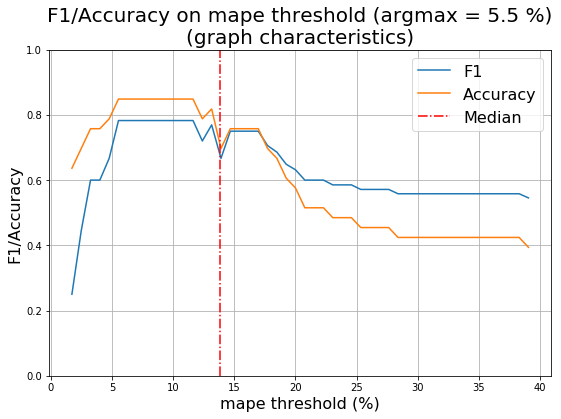

In [8]:
'''Dependence of F1-score and accurasy on median MAPE bound'''
f1, acc = [],[]
bnd=np.linspace(table.minmape.min()+.5,table.minmape.max()-.5,50)
for bound in bnd:
    tp=len(table[(table.cluster==0) & (table.minmape<bound)])
    tn=len(table[(table.cluster==1) & (table.minmape>=bound)])
    fp=len(table[(table.cluster==0) & (table.minmape>=bound)])
    fn=len(table[(table.cluster==1) & (table.minmape<bound)])
    #sensitivity, specificity = tp/(tp+fn)*100, fp/(tn+fp)*100 
    precision, recall = tp/(tp+fp), tp/(tp+fn)
    acc.append((tp+tn)/(tp+tn+fp+fn))
    f1.append(2*precision*recall/(precision+recall))
bound = np.median(table.minmape)
plt.figure(figsize=(9,6))
plt.title('F1/Accuracy on mape threshold (argmax = %.1f %%)\n(graph characteristics)'%bnd[np.argmax(f1)], size=20)
plt.plot(bnd,f1, label='F1')
plt.plot(bnd,acc, label='Accuracy')
plt.axvline(bound, color='red', ls='-.', label='Median')
plt.legend(fontsize=16)
plt.xlabel('mape threshold (%)', size=16)
plt.ylabel('F1/Accuracy', size=16)
plt.ylim(0,1.0)
plt.grid()
#plt.savefig('f1_graph.png', dpi=600, facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

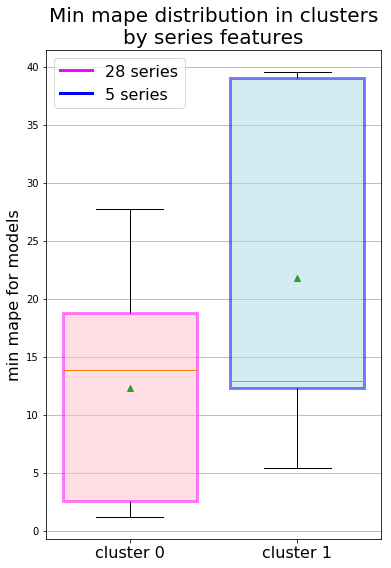

In [9]:
'''Clustering by time series features'''
z=['Noise', 'Hurst', 'KSent', 'Rndwl', 'Corent']
model = KMeans(n_clusters=2)
zz=table[z]
model.fit(zz)
cluster=model.predict(zz)
table['cluster']=cluster
c0=table[table.cluster == 0].minmape.values
c1=table[table.cluster == 1].minmape.values
if c0.mean()>c1.mean(): #Let cluster 0 be for 'good' predictability
    table.cluster = 1-table.cluster.values
    c0=table[table.cluster == 0].minmape.values
    c1=table[table.cluster == 1].minmape.values
del model
'''Pictured boxplots for clusters'''
boxprops1 = dict(linewidth=3, color='magenta', facecolor = 'pink', alpha=.5)
boxprops2 = dict(linewidth=3, color='blue', facecolor = 'lightblue', alpha=.5)
flierprops = dict(marker='o', markerfacecolor='yellow', markersize=8, linestyle='none') 
plt.figure(figsize=(6,9))
plt.title('Min mape distribution in clusters\nby series features', size=20)
plt.boxplot([c0],positions = [1],widths=0.8,
            boxprops=boxprops1,flierprops=flierprops, showmeans=True, patch_artist=True)
plt.boxplot([c1],positions = [2],widths=0.8,
            boxprops=boxprops2,flierprops=flierprops, showmeans=True, patch_artist=True)
plt.plot([],c='magenta', lw=3, label='%d series'%len(c0))
plt.plot([],c='blue', lw=3, label='%d series'%len(c1))
plt.xticks([1,2],['cluster 0','cluster 1'], fontsize=16)
plt.xlim(0.5,2.5)
plt.ylabel('min mape for models', size=16)
plt.grid(axis='y')
plt.legend(loc=2, fontsize=16)
#plt.savefig('box_series.png', dpi=600, facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

In [10]:
'''F1-score and accurasy on median MAPE bound'''
bound = np.median(table.minmape)
tp=len(table[(table.cluster==0) & (table.minmape<bound)])
tn=len(table[(table.cluster==1) & (table.minmape>=bound)])
fp=len(table[(table.cluster==0) & (table.minmape>=bound)])
fn=len(table[(table.cluster==1) & (table.minmape<bound)])
sensitivity, specificity = tp/(tp+fn)*100, fp/(tn+fp)*100 
precision, recall = tp/(tp+fp), tp/(tp+fn) 
accuracy=int((tp+tn)/(tp+tn+fp+fn)*100)
f=2*precision*recall/(precision+recall)
print('For clustering by series features:')
print('MAPE bound = %.2f%% => F1-score = %.2f; Accuracy = %d %%'%(bound, f, accuracy))

For clustering by series features:
MAPE bound = 13.82% => F1-score = 0.59; Accuracy = 45 %


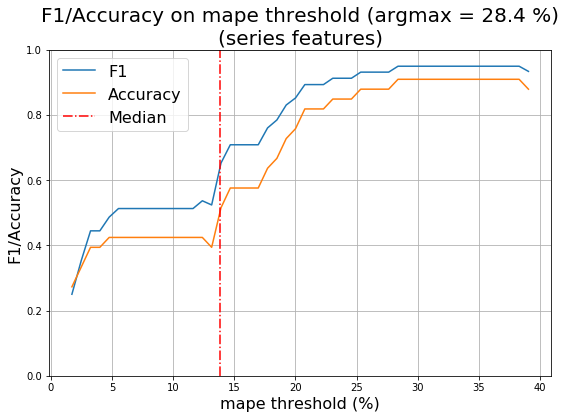

In [11]:
'''Dependence of F1-score and accurasy on median MAPE bound'''
f1, acc = [],[]
bnd=np.linspace(table.minmape.min()+.5,table.minmape.max()-.5,50)
for bound in bnd:
    tp=len(table[(table.cluster==0) & (table.minmape<bound)])
    tn=len(table[(table.cluster==1) & (table.minmape>=bound)])
    fp=len(table[(table.cluster==0) & (table.minmape>=bound)])
    fn=len(table[(table.cluster==1) & (table.minmape<bound)])
    #sensitivity, specificity = tp/(tp+fn)*100, fp/(tn+fp)*100 
    precision, recall = tp/(tp+fp), tp/(tp+fn)
    acc.append((tp+tn)/(tp+tn+fp+fn))
    f1.append(2*precision*recall/(precision+recall))
bound = np.median(table.minmape)
plt.figure(figsize=(9,6))
plt.title('F1/Accuracy on mape threshold (argmax = %.1f %%)\n(series features)'%bnd[np.argmax(f1)], size=20)
plt.plot(bnd,f1, label='F1')
plt.plot(bnd,acc, label='Accuracy')
plt.axvline(bound, color='red', ls='-.', label='Median')
plt.legend(fontsize=16)
plt.xlabel('mape threshold (%)', size=16)
plt.ylabel('F1/Accuracy', size=16)
plt.ylim(0,1.0)
plt.grid()
#plt.savefig('f1_series.png', dpi=600, facecolor='w', edgecolor='w', orientation='portrait')
plt.show()